# Imports

In [1]:
# For data manipulation
import numpy as np
import pandas as pd

In [2]:
# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

**Load Dataset**

In [4]:
# Load dataset into a dataframe
df = pd.read_csv('data/car_prices.csv')

# Display first few rows of the dataframe
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


**Data Dictionary** 

Variable  |Description |
-----|-----|
Vehicle Details |Includes specific information about each vehicle, such as its make, model, trim, and manufacturing year.|
Transaction Information | Provides insights into the sales transactions, including selling prices and sale dates.|
Market Trends | MMR values offer an estimate of the market value of each vehicle, allowing for analysis of market trends and fluctuations.|
Condition and Mileage | Contains data on the condition of the vehicles as well as their odometer readings, enabling analysis of how these factors influence selling prices.|

# Data Discovery

**Gather basic information about the data**

In [5]:
# How large the dataset is. Total values across the whole data
print('Size:', df.size)

# Basic info
df.info()

Size: 8941392
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


- dataset has 8.9M values (almost $9M!)
- 558837 rows representing a unique car transaction 
- 16 features with information about the car and transaction
- 11 Categorical Variables: make, model, trim, body, transmission, vin, state, color, interior,seller, saledate
- 5 Numerical Variables: year, condition, odometer, mmr, sellingprice

- Only the year, state, and seller columns do NOT have null values, the other 13 all contain null values 

**Statistics summary**

In [6]:
df.describe()

,year,condition,odometer,mmr,sellingprice
count,558837.000000,547017.000000,558743.000000,558799.000000,558825.000000
mean,2010.038927,30.672365,68320.017767,13769.377495,13611.358810
std,3.966864,13.402832,53398.542821,9679.967174,9749.501628
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,23.000000,28371.000000,7100.000000,6900.000000
50%,2012.000000,35.000000,52254.000000,12250.000000,12100.000000
75%,2013.000000,42.000000,99109.000000,18300.000000,18200.000000
max,2015.000000,49.000000,999999.000000,182000.000000,230000.000000


- the sales transaction dates from 1982 to 2015.
- 50% of the transactions occured after 2012. In other words, 50% of transactions were for cars maded in 1982-2011 amd 50% were maded in the last 3 years (2012-2015). 
- vehicle conditions range from 1-49 with an average around ~30
- odometer readings are from 1 to 999,999 with an average around 
- the mmr is relatively close to the selling price which suggests it is a good indicator of the vehicle selling price. 
- vehicles were sold at minimum for $1 and max for $230K. The mean car price is around $13.6K

# Data Structuring

## saledate

In [7]:
# filter by saledate column to review the data 
df['saledate'].head(2)

0    Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1    Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
Name: saledate, dtype: object

saledate column is a concatenation of various date information (weekday, month, year, etc.). Let's separate them into new columns

In [8]:
# create new columns to store split data from saledate
df[['sale_weekday','sale_month','sale_day','sale_year','sale_time','sale_time_zone','sale_time_zone2']] = df['saledate'].str.split(' ',expand=True)
df.head(2)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,sale_weekday,sale_month,sale_day,sale_year,sale_time,sale_time_zone,sale_time_zone2
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),Tue,Dec,16,2014,12:30:00,GMT-0800,(PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),Tue,Dec,16,2014,12:30:00,GMT-0800,(PST)


Create a copy of the original dataframe and drop the original saledate column because its redundant.

In [9]:
df_new= df.copy()
df_new = df.drop(columns=['saledate','sale_time','sale_time_zone','sale_time_zone2'])

In [10]:
df_new.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,sale_weekday,sale_month,sale_day,sale_year
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue,Dec,16,2014
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue,Dec,16,2014
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu,Jan,15,2015
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu,Jan,29,2015
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu,Dec,18,2014


**Next, check unique values for categorical variables**

## make 

Check out the unique values of the make column since it's categorical

In [11]:
# Count number of unique values 
num_unique_values = df_new['make'].nunique()
print(f'Number of unique values: {num_unique_values}')

# Find out how many types exists for categorical column
df_new['make'].sort_values(ascending = True).unique()

Number of unique values: 96


array(['Acura', 'Aston Martin', 'Audi', 'BMW', 'Bentley', 'Buick',
       'Cadillac', 'Chevrolet', 'Chrysler', 'Daewoo', 'Dodge', 'FIAT',
       'Ferrari', 'Fisker', 'Ford', 'GMC', 'Geo', 'HUMMER', 'Honda',
       'Hyundai', 'Infiniti', 'Isuzu', 'Jaguar', 'Jeep', 'Kia',
       'Lamborghini', 'Land Rover', 'Lexus', 'Lincoln', 'Lotus', 'MINI',
       'Maserati', 'Mazda', 'Mercedes-Benz', 'Mercury', 'Mitsubishi',
       'Nissan', 'Oldsmobile', 'Plymouth', 'Pontiac', 'Porsche', 'Ram',
       'Rolls-Royce', 'Saab', 'Saturn', 'Scion', 'Subaru', 'Suzuki',
       'Tesla', 'Toyota', 'Volkswagen', 'Volvo', 'acura', 'airstream',
       'audi', 'bmw', 'buick', 'cadillac', 'chev truck', 'chevrolet',
       'chrysler', 'dodge', 'dodge tk', 'dot', 'ford', 'ford tk',
       'ford truck', 'gmc', 'gmc truck', 'honda', 'hyundai', 'hyundai tk',
       'jeep', 'kia', 'land rover', 'landrover', 'lexus', 'lincoln',
       'maserati', 'mazda', 'mazda tk', 'mercedes', 'mercedes-b',
       'mercury', 'mitsubish

There are 96 unique values for car make but many are duplicates with different text cases or spelling

for example
- volkswagen vs. vw
- Suzuki vs. suzuki
- subaru vs.Subaru

**Replace duplicates by converting all the variations of each make to a common format**

In [12]:
# create a dictionary of replacements
make_replacements = {
                    'Volvo': 'volvo',
                    'vw': 'volkswagen',
                    'Jaguar': 'jaguar',
                    'Volkswagen': 'volkswagen',
                    'Suzuki':'suzuki', 
                    'Subaru': 'subaru', 
                    'Porsche': 'porsche',
                    'Pontiac': 'pontiac',
                    'Plymouth':'plymouth',
                    'Oldsmobile':'oldsmobile',
                    'Mitsubishi':'mitsubishi', 
                    'Mercury':'mercury',
                    'Maserati': 'maserati',
                    'Hyundai': 'hyundai',
                    'hyundai tk': 'hyundai',
                    'Honda':'honda',
                    'Ford':  'ford',
                    'Acura': 'acura',
                    'Audi':'audi',
                    'BMW': 'bmw',
                    'Buick': 'buick', 
                    'Lincoln': 'lincoln',
                    'Lexus': 'lexus',
                    'Toyota': 'toyota',
                    'GMC': 'gmc',
                    'gmc truck':'gmc',
                    'Mercedes-Benz': 'mercedes',
                    'mercedes-b': 'mercedes',
                    'Mazda':'mazda',
                    'mazda tk': 'mazda',
                    'landrover':  'land rover',
                    'Pontiac': 'pontiac',
                    'ford tk': 'ford', 
                    'ford truck': 'ford', 
                    'Chevrolet': 'chevrolet',
                    'chev truck': 'chevrolet',
                    'Cadillac': 'cadillac',
                    'Nissan':  'nissan', 
                    'Chrysler':'chrysler',
                    'Dodge':'dodge', 
                    'dodge tk':'dodge',
                    'Kia':'kia',
                    'Jeep': 'jeep',
                    'MINI':'mini',
                    'FIAT':'fiat',
                    'Ferrari': 'ferrari',
                    'Ram': 'ram',
                    'Bentley':'bentley',
                    'Saturn':'saturn',
                    'HUMMER': 'hummer',
                    'Saab':'saab',
                    'Rolls-Royce':'rolls royce',
                    'Daewoo':'daewoo',
                    'Isuzu': 'isuzu',
                    'Geo': 'geo',
                    'Tesla':'tesla',
                    'Aston Martin': 'aston martin',
                    'Fisker': 'fisker',
                    'Lamborghini':'lamborghini',
                    'Lotus':'lotus',
                    'Infiniti':'infiniti',
                    'Land Rover':'land rover',
                    'Scion':'scion',
                    'dot':'dodge'
                     }

# replace values using the .map() method
df_new['make'] = df_new['make'].map(make_replacements).fillna(df_new['make'])

# print the DataFrame
df_new['make'].sort_values(ascending=True).unique()

array(['acura', 'airstream', 'aston martin', 'audi', 'bentley', 'bmw',
       'buick', 'cadillac', 'chevrolet', 'chrysler', 'daewoo', 'dodge',
       'ferrari', 'fiat', 'fisker', 'ford', 'geo', 'gmc', 'honda',
       'hummer', 'hyundai', 'infiniti', 'isuzu', 'jaguar', 'jeep', 'kia',
       'lamborghini', 'land rover', 'lexus', 'lincoln', 'lotus',
       'maserati', 'mazda', 'mercedes', 'mercury', 'mini', 'mitsubishi',
       'nissan', 'oldsmobile', 'plymouth', 'pontiac', 'porsche', 'ram',
       'rolls royce', 'saab', 'saturn', 'scion', 'smart', 'subaru',
       'suzuki', 'tesla', 'toyota', 'volkswagen', 'volvo', nan],
      dtype=object)

A quick glance shows the duplicates have been replaced. Let's check the count of unique values again

In [13]:
num_unique_values = df_new['make'].nunique()
print(f'Number of unique values: {num_unique_values}')

Number of unique values: 54


After removing the duplicates, the actual unique value count for car make has been reduced from 96 to 54.

## model

In [14]:
# Count number of unique values 
num_unique_values = df_new['model'].nunique()
print(f'Number of unique values: {num_unique_values}')

# Find out how many types exists for categorical column
df_new['model'].sort_values(ascending = True).unique()

Number of unique values: 973


array(['1', '1 Series', '1500', '190-Class', '2 Series', '200', '200SX',
       '2500', '3', '3 Series', '3 Series Gran Turismo', '300',
       '300-Class', '3000GT', '300M', '300ZX', '300e', '320i', '323i',
       '328i', '350', '3500', '350Z', '350z', '360', '370Z', '4 Series',
       '4 Series Gran Coupe', '400-Class', '420-Class', '420sel', '42c',
       '458 Italia', '4Runner', '5 Series', '5 Series Gran Turismo',
       '500', '500-Class', '500L', '500e', '6', '6 Series',
       '6 Series Gran Coupe', '626', '7', '7 Series', '750i', '750li',
       '750lxi', '8 Series', '850', '9-2X', '9-3', '9-5', '9-7X', '911',
       '940', '960', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'ATS', 'Acadia',
       'Accent', 'Accord', 'Accord Crosstour', 'Accord Hybrid', 'Achieva',
       'ActiveHybrid 5', 'ActiveHybrid 7', 'ActiveHybrid X6', 'Aerio',
       'Alero', 'Altima', 'Altima Hybrid', 'Amanti', 'Amigo', 'Armada',
       'Ascender', 'Aspen', 'Aspire', 'Astra', 'Astro', 'Astro Cargo',
       'Au

There are 973 unique values for car models but many are duplicates with different text cases or spelling

for example
- Accord vs. accord
- Tundra vs. tundra 
- Yaris vs. yaris

**Replace duplicates by converting all the variations of each model to a common format**

In [15]:
# create a dictionary of replacements
model_replacements = { 
                     'A4':'a4',
                     'A6': 'a6',
                     'Accord': 'accord',
                     'Alero': 'alero',
                     'Astro': 'astro',
                     'Avalon': 'avalon',
                     'Avenger': 'avenger',
                     'Aveo': 'aveo',
                     'Beetle': 'beetle',
                     'Borrego': 'borrego',
                     'Breeze': 'breeze',
                     'CX-7': 'cx-7',
                     'Camaro': 'camaro',
                     'Camry': 'camry',
                     'Caravan': 'caravan',
                     'Cavalier': 'cavalier',
                     'Century': 'century',
                     'Charger': 'charger',
                     'Cherokee': 'cherokee',
                     'Civic': 'civic',
                     'Civic del Sol': 'cobalt',
                     'Classic': 'colorado',
                     'Commander': 'comm',
                     'Compass': 'compass',
                     'Concorde': 'concorde',
                     'Corolla': 'corolla',
                     'Corsica': 'corsica',
                     'Corvette': 'corvette',
                     'Cougar': 'cougar',
                     'Crossfire': 'crossfire',
                     'Crown Victoria': 'crown',
                     'Cruze': 'cruze',
                     'DTS': 'dts',
                     'Dakota': 'dakota',
                     'Discovery': 'discovery',
                     'Durango': 'durango',
                     'E-150': 'e150',
                     'E-250': 'e250',
                     'E-350': 'e350',
                     'Elantra': 'elantra',
                     'Endeavor': 'endeavor',
                     'Envoy': 'envoy',
                     'Equinox': 'equinox',
                     'Escalade': 'escalade',
                     'Escape': 'escape',
                     'EuroVan': 'eurovan',
                     'Excursion': 'excurs',
                     'Expedition': 'expedition',
                     'expedit': 'expedition',
                     'expeditn': 'expedition',
                     'Explorer': 'explorer',
                     'F-150': 'f150',
                     'F-250': 'f250',
                     'F-350 Super Duty': 'f350',
                     'Focus': 'focus',
                     'Forester': 'forester',
                     'Freestyle': 'freestyle',
                     'G5': 'g5',
                     'G6': 'g6',
                     'Galant': 'galant',
                     'Golf': 'golf',
                     'GranSport': 'grand',
                     'GranTurismo': 'gx',
                     'Impala': 'impala',
                     'Intrepid': 'intrepid',
                     'Intrigue': 'intrigue',
                     'Jetta': 'jetta',
                     'Journey': 'journey',
                     'LR3': 'lr3',
                     'LaCrosse': 'lacrosse',
                     'Lancer': 'lancer',
                     'Legacy': 'legacy',
                     'Legend': 'lumina',
                     'Magnum': 'magnum',
                     'Malibu': 'malibu',
                     'Matrix': 'matrix',
                     'Mazda3': 'mazda3',
                     'Mazda5': 'mazda5',
                     'Mazda6': 'mazda6',
                     'Montana': 'montana',
                     'Mountaineer': 'mountaineer',
                     'mountnr': 'mountaineer',
                     'Neon': 'neon',
                     'Odyssey': 'odyssey',
                     'Optima': 'optima',
                     'Pacifica': 'pacifica',
                     'Passat': 'passat',
                     'Pathfinder': 'pathfinder',
                     'pathfind': 'pathfinder',
                     'Patriot': 'patriot',
                     'Pickup': 'pickup',
                     'Pilot': 'pilot',
                     'Quattroporte': 'quattroporte',
                     'Quest': 'quest',
                     'RL': 'rl',
                     'RS 7': 'rr',
                     'RX-8': 'rx8',
                     'Rainier': 'rainier',
                     'Ram Cargo': 'ram',
                     'Ram Pickup 3500': 'ram3500',
                     'Range Rover': 'rangerover',
                     'range': 'rangerover',
                     'ranger': 'rangerover',
                     'Range Rover Sport': 'rrs',
                     'Regal': 'regal',
                     'Ridgeline': 'ridgelin',
                     'Rio': 'rio',
                     'Routan': 'routan',
                     'S-10': 's10',
                     'SRX': 'srx',
                     'STS': 'sts',
                     'SX4': 'sx4',
                     'Safari': 'safari',
                     'Santa Fe': 'santa',
                     'Savana': 'savana',
                     'Sebring': 'sebring',
                     'Sienna': 'sienna',
                     'Sierra 1500': 'siera',
                     'Silhouette': 'silhouette',
                     'Sonic': 'sonic',
                     'Sonoma': 'sonoma',
                     'Sportage': 'sportage',
                     'Sprinter': 'sprinter',
                     'Stratus': 'stratus',
                     'Suburban': 'suburban',
                     'subrbn': 'suburban',
                     'Tahoe': 'tahoe',
                     'Taurus': 'taurus',
                     'Thunderbird': 'thunderbird',
                     'Town Car': 'town',
                     'Town and Country': 'twn&country',
                     'twn/cntry': 'twn&country',
                     'Tribute': 'tribute',
                     'Tucson': 'tucson',
                     'Tundra': 'tundra',
                     'Uplander': 'uplander',
                     'uplandr': 'uplander',
                     'Venture': 'venture',
                     'Versa': 'versa',
                     'Vibe': 'vibe',
                     'Villager': 'villager',
                     'Voyager': 'voyager',
                     'Windstar': 'windstar',
                     'Wrangler': 'wrangler',
                     'X3': 'x3',
                     'Yaris': 'yaris',
                     'Yukon': 'yukon'

                     }

# replace values using the .map() method
df_new['model'] = df_new['model'].map(model_replacements).fillna(df_new['model'])

# print the DataFrame
df_new['model'].sort_values(ascending=True).unique()

array(['1', '1 Series', '1500', '190-Class', '2 Series', '200', '200SX',
       '2500', '3', '3 Series', '3 Series Gran Turismo', '300',
       '300-Class', '3000GT', '300M', '300ZX', '300e', '320i', '323i',
       '328i', '350', '3500', '350Z', '350z', '360', '370Z', '4 Series',
       '4 Series Gran Coupe', '400-Class', '420-Class', '420sel', '42c',
       '458 Italia', '4Runner', '5 Series', '5 Series Gran Turismo',
       '500', '500-Class', '500L', '500e', '6', '6 Series',
       '6 Series Gran Coupe', '626', '7', '7 Series', '750i', '750li',
       '750lxi', '8 Series', '850', '9-2X', '9-3', '9-5', '9-7X', '911',
       '940', '960', 'A3', 'A5', 'A7', 'A8', 'ATS', 'Acadia', 'Accent',
       'Accord Crosstour', 'Accord Hybrid', 'Achieva', 'ActiveHybrid 5',
       'ActiveHybrid 7', 'ActiveHybrid X6', 'Aerio', 'Altima',
       'Altima Hybrid', 'Amanti', 'Amigo', 'Armada', 'Ascender', 'Aspen',
       'Aspire', 'Astra', 'Astro Cargo', 'Aura', 'Aura Hybrid', 'Aurora',
       'Avalanche

In [16]:
num_unique_values = df_new['model'].nunique()
print(f'Number of unique values: {num_unique_values}')

Number of unique values: 826


After removing the duplicates, the actual unique value count for car model has been reduced from 973 to 826

## body


In [17]:
# Count number of unique values 
num_unique_values = df_new['body'].nunique()
print(f'Number of unique values: {num_unique_values}')

# Find out how many types exists for categorical column
df_new['body'].sort_values(ascending = True).unique()

Number of unique values: 87


array(['Access Cab', 'Beetle Convertible', 'CTS Coupe', 'CTS Wagon',
       'CTS-V Coupe', 'CTS-V Wagon', 'Cab Plus', 'Cab Plus 4', 'Club Cab',
       'Convertible', 'Coupe', 'Crew Cab', 'CrewMax Cab', 'Double Cab',
       'E-Series Van', 'Elantra Coupe', 'Extended Cab', 'G Convertible',
       'G Coupe', 'G Sedan', 'G37 Convertible', 'G37 Coupe',
       'Genesis Coupe', 'GranTurismo Convertible', 'Hatchback',
       'King Cab', 'Koup', 'Mega Cab', 'Minivan', 'Navitgation',
       'Promaster Cargo Van', 'Q60 Convertible', 'Q60 Coupe', 'Quad Cab',
       'Ram Van', 'Regular Cab', 'SUV', 'Sedan', 'SuperCab', 'SuperCrew',
       'TSX Sport Wagon', 'Transit Van', 'Van', 'Wagon', 'Xtracab',
       'access cab', 'beetle convertible', 'cab plus 4', 'club cab',
       'convertible', 'coupe', 'crew cab', 'crewmax cab', 'cts coupe',
       'cts wagon', 'cts-v coupe', 'double cab', 'e-series van',
       'elantra coupe', 'extended cab', 'g convertible', 'g coupe',
       'g sedan', 'g37 convertib

There are 87 unique values for car body but many are duplicates with different text cases or spelling

For example
- Access Cab vs. access cab
- Beetle Convertible vs. beetle convertible
- CTS Coupe vs. cts coupe

**Replace duplicates by converting all the variations of each body to a common format**

In [18]:
# create a dictionary of replacements
body_replacements = {'Access Cab':  'access cab',
                    'CTS Coupe': 'cts coupe',
                    'Beetle Convertible': 'beetle convertible', 
                    'CTS Wagon':'cts wagon',
                    'CTS-V Coupe':'cts-v coupe',
                    'CTS-V Wagon': 'cts-v wagon',
                    'Cab Plus 4': 'cab plus 4',
                    'Club Cab': 'club cab',
                    'Convertible': 'convertible', 
                    'Coupe': 'coupe',
                    'Crew Cab': 'crew cab',
                    'CrewMax Cab': 'crewmax cab',
                    'Double Cab':'double cab',
                    'E-Series Van':  'e-series van',
                    'Elantra Coupe': 'elantra coupe', 
                    'Extended Cab': 'extended cab', 
                    'G Convertible': 'g convertible',
                    'G Coupe': 'g coupe',
                    'G Sedan': 'g sedan', 
                    'G37 Convertible':'g37 convertible',
                    'G37 Coupe':'g37 coupe',
                    'Genesis Coupe': 'genesis coupe',
                    'GranTurismo Convertible': 'granturismo convertible',
                    'Hatchback':'hatchback',
                    'King Cab': 'king cab',
                    'Koup':  'koup',
                    'Mega Cab':  'mega cab',
                    'Minivan':  'minivan',
                    'Promaster Cargo Van': 'promaster cargo van', 
                    'Q60 Convertible': 'q60 convertible',
                    'Q60 Coupe':  'q60 coupe',
                    'Quad Cab':'quad cab',
                    'Regular Cab': 'regular cab', 
                    'regular-cab': 'regular cab',
                    'SUV': 'suv',
                    'Sedan': 'sedan',
                    'SuperCab':  'supercab',
                    'SuperCrew':'supercrew', 
                    'TSX Sport Wagon': 'tsx sport wagon',
                    'Transit Van': 'transit van',
                    'Van':  'van',
                    'Wagon': 'wagon',
                    'Xtracab': 'xtracab',
                    'Cab Plus':'cab plus',
                    'Navitgation':'navitgation',
                    'Ram Van':'ram van'
                     }

# replace values using the .map() method
df_new['body'] = df_new['body'].map(body_replacements).fillna(df_new['body'])

# print the DataFrame
df_new['body'].sort_values(ascending=True).unique()

array(['access cab', 'beetle convertible', 'cab plus', 'cab plus 4',
       'club cab', 'convertible', 'coupe', 'crew cab', 'crewmax cab',
       'cts coupe', 'cts wagon', 'cts-v coupe', 'cts-v wagon',
       'double cab', 'e-series van', 'elantra coupe', 'extended cab',
       'g convertible', 'g coupe', 'g sedan', 'g37 convertible',
       'g37 coupe', 'genesis coupe', 'granturismo convertible',
       'hatchback', 'king cab', 'koup', 'mega cab', 'minivan',
       'navitgation', 'promaster cargo van', 'q60 convertible',
       'q60 coupe', 'quad cab', 'ram van', 'regular cab', 'sedan',
       'supercab', 'supercrew', 'suv', 'transit van', 'tsx sport wagon',
       'van', 'wagon', 'xtracab', nan], dtype=object)

## transmission

In [19]:
# Count number of unique values 
num_unique_values = df_new['transmission'].nunique()
print(f'Number of unique values: {num_unique_values}')

#Find out how many types exists for categorical column
df_new['transmission'].sort_values(ascending = True).unique()

Number of unique values: 4


array(['Sedan', 'automatic', 'manual', 'sedan', nan], dtype=object)

- Transmission has 4 unique values but 'sedan' is not transmission type. 
- sedan is also duplicated with different text cases
    - Sedan/sedan

First, fix the duplication by converting *Sedan* to *sedan*

In [20]:
# create a dictionary of replacements
transmission_replacements = {'Sedan':  'sedan'}

# replace values using the .map() method
df_new['transmission'] = df_new['transmission'].map(transmission_replacements).fillna(df_new['transmission'])

# print the DataFrame
df_new['transmission'].sort_values(ascending=True).unique()

array(['automatic', 'manual', 'sedan', nan], dtype=object)

Review rows where transmission equals *sedan* to discover insights on this error

In [21]:
# Create a Boolean mask to separate rows where transmission equals sedan 
mask_trans = (df_new['transmission'] == 'sedan')

# save subset of rows as new dataframe
df_subset = df_new[mask_trans]

# view subset 
df_subset.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,sale_weekday,sale_month,sale_day,sale_year
408161,2015,volkswagen,jetta,SE PZEV w/Connectivity,navitgation,sedan,automatic,3vwd17aj4fm201708,NaN,46.0,4802,silver,gray,NaN,13200.0,16500,None,None,None
417835,2015,volkswagen,jetta,SE PZEV w/Connectivity,navitgation,sedan,automatic,3vwd17aj2fm258506,NaN,1.0,9410,white,gray,NaN,13300.0,10500,None,None,None
421289,2015,volkswagen,jetta,SE PZEV w/Connectivity,navitgation,sedan,automatic,3vwd17aj3fm276741,NaN,46.0,1167,blue,black,NaN,13200.0,12700,None,None,None
424161,2015,volkswagen,jetta,SE PZEV w/Connectivity,navitgation,sedan,automatic,3vwd17aj2fm285365,NaN,1.0,2172,gray,black,NaN,14050.0,8250,None,None,None
427040,2015,volkswagen,jetta,SE PZEV w/Connectivity,navitgation,sedan,automatic,3vwd17aj0fm227318,NaN,41.0,14872,gray,black,NaN,13700.0,14300,None,None,None


- Data entry error is likely the cause of this error.
- The year, make, model column values looks correct. 
- However, the data for all the columns to the right (trim, body, etc.) are incorrect. 

These values in these columns should be shifted one column over to the left. 

1. Drop the subset rows where transmission = sedan from the df_new. It will be added back after the values are shifted to the correct column

In [22]:
# create variable to store rows where transmission = sedan
drop_rows = df_new[df_new['transmission'] == 'sedan'].index

# drop all rows with transimision = sedan from df2
df_new.drop(drop_rows, inplace=True)

# compare shape of both original df and new df to confirm rows have been droped
print('original row count:                      ',df.shape[0])
print('row count after dropping rows with errors', df_new.shape[0])

original row count:                       558837
row count after dropping rows with errors 558811


2. split  df_subset into 2 sections: left and right

- The left section contains the first 3 columns (year, make, model) which are correct and does not need to be shifted

- The right section are all columns with data errors and needs to be shifted to the left

In [23]:
# separate 'year','make','model' columns from subet because they are correct.
left = df_subset[['year','make','model']]
left.head()

,year,make,model
408161,2015,volkswagen,jetta
417835,2015,volkswagen,jetta
421289,2015,volkswagen,jetta
424161,2015,volkswagen,jetta
427040,2015,volkswagen,jetta


In [24]:
# create df for right side columns where data is incorrect and
right = df_subset.drop(columns=['year','make','model'])
right.head()

,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,sale_weekday,sale_month,sale_day,sale_year
408161,SE PZEV w/Connectivity,navitgation,sedan,automatic,3vwd17aj4fm201708,NaN,46.0,4802,silver,gray,NaN,13200.0,16500,None,None,None
417835,SE PZEV w/Connectivity,navitgation,sedan,automatic,3vwd17aj2fm258506,NaN,1.0,9410,white,gray,NaN,13300.0,10500,None,None,None
421289,SE PZEV w/Connectivity,navitgation,sedan,automatic,3vwd17aj3fm276741,NaN,46.0,1167,blue,black,NaN,13200.0,12700,None,None,None
424161,SE PZEV w/Connectivity,navitgation,sedan,automatic,3vwd17aj2fm285365,NaN,1.0,2172,gray,black,NaN,14050.0,8250,None,None,None
427040,SE PZEV w/Connectivity,navitgation,sedan,automatic,3vwd17aj0fm227318,NaN,41.0,14872,gray,black,NaN,13700.0,14300,None,None,None


3. for the right side, shift columns to the left

In [25]:
right = right.shift(-1, axis=1)
right.head()

,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,sale_weekday,sale_month,sale_day,sale_year
408161,navitgation,sedan,automatic,3vwd17aj4fm201708,NaN,46.0,4802,silver,gray,NaN,13200.0,16500,None,None,None,None
417835,navitgation,sedan,automatic,3vwd17aj2fm258506,NaN,1.0,9410,white,gray,NaN,13300.0,10500,None,None,None,None
421289,navitgation,sedan,automatic,3vwd17aj3fm276741,NaN,46.0,1167,blue,black,NaN,13200.0,12700,None,None,None,None
424161,navitgation,sedan,automatic,3vwd17aj2fm285365,NaN,1.0,2172,gray,black,NaN,14050.0,8250,None,None,None,None
427040,navitgation,sedan,automatic,3vwd17aj0fm227318,NaN,41.0,14872,gray,black,NaN,13700.0,14300,None,None,None,None


4. merge both left and right sections back together

In [26]:
df_subset = left.merge(right, right_index=True, left_index=True)
df_subset.head()            

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,sale_weekday,sale_month,sale_day,sale_year
408161,2015,volkswagen,jetta,navitgation,sedan,automatic,3vwd17aj4fm201708,NaN,46.0,4802,silver,gray,NaN,13200.0,16500,None,None,None,None
417835,2015,volkswagen,jetta,navitgation,sedan,automatic,3vwd17aj2fm258506,NaN,1.0,9410,white,gray,NaN,13300.0,10500,None,None,None,None
421289,2015,volkswagen,jetta,navitgation,sedan,automatic,3vwd17aj3fm276741,NaN,46.0,1167,blue,black,NaN,13200.0,12700,None,None,None,None
424161,2015,volkswagen,jetta,navitgation,sedan,automatic,3vwd17aj2fm285365,NaN,1.0,2172,gray,black,NaN,14050.0,8250,None,None,None,None
427040,2015,volkswagen,jetta,navitgation,sedan,automatic,3vwd17aj0fm227318,NaN,41.0,14872,gray,black,NaN,13700.0,14300,None,None,None,None


5. Add subset back to main dataframe (df_new)

In [27]:
# concat masked df to main df
df_new = pd.concat([df_new, df_subset], axis=0)
df_new.shape

(558837, 19)

the shape is now same as original. 

In [28]:
# Find out how many types exists for categorical column
df_new['transmission'].sort_values(ascending = True).unique()

array(['automatic', 'manual', nan], dtype=object)

Quickly check a row # 408161that previously had an error

In [29]:
df_new.iloc[408161]

year                             2012
make                          hyundai
model                          Sonata
trim                          Limited
body                            sedan
transmission                automatic
vin                 5npec4ac6ch440292
state                              ca
condition                        47.0
odometer                      22584.0
color                            gray
interior                        beige
seller          hyundai motor finance
mmr                           16250.0
sellingprice                  17200.0
sale_weekday                      Tue
sale_month                        May
sale_day                           19
sale_year                        2015
Name: 408162, dtype: object

Now, the transmission column only shows 3 unique values and row #408161 also confirms the cell data has been corrected

## state


In [30]:
# Count number of unique values 
num_unique_values = df_new['state'].nunique()
print(f'Number of unique values: {num_unique_values}')

# Find out how many types exists for categorical column
df_new['state'].sort_values(ascending = True).unique()

Number of unique values: 38


array(['ab', 'al', 'az', 'ca', 'co', 'fl', 'ga', 'hi', 'il', 'in', 'la',
       'ma', 'md', 'mi', 'mn', 'mo', 'ms', 'nc', 'ne', 'nj', 'nm', 'ns',
       'nv', 'ny', 'oh', 'ok', 'on', 'or', 'pa', 'pr', 'qc', 'sc', 'tn',
       'tx', 'ut', 'va', 'wa', 'wi', nan], dtype=object)

no errors found with unique values in the state column

## color


In [31]:
# Count number of unique values 
num_unique_values = df_new['color'].nunique()
print(f'Number of unique values: {num_unique_values}')

# Find out how many types exists for categorical column
df_new['color'].unique()

Number of unique values: 20


array(['white', 'gray', 'black', 'red', 'silver', 'blue', 'brown',
       'beige', 'purple', 'burgundy', '—', 'gold', 'yellow', 'green',
       'charcoal', nan, 'orange', 'off-white', 'turquoise', 'pink',
       'lime'], dtype=object)

'-' and nan are equivalent, should convert it to nan

## interior


In [32]:
# Count number of unique values 
num_unique_values = df_new['interior'].nunique()
print(f'Number of unique values: {num_unique_values}')

# Find out how many types exists for categorical column
df_new['interior'].unique()

Number of unique values: 17


array(['black', 'beige', 'tan', '—', 'gray', 'brown', 'burgundy', 'white',
       nan, 'silver', 'off-white', 'blue', 'red', 'yellow', 'green',
       'purple', 'orange', 'gold'], dtype=object)

interior has the '-' value which can be converted to Nan

Convert `-` to Nan for color and interior columns 

In [33]:
# change `-` to NaN 
df_new['color'].replace('—', np.nan,inplace=True)
df_new['interior'].replace('—', np.nan,inplace=True)

C:\Users\tunhi\AppData\Local\Temp\ipykernel_22780\1186024981.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_new['color'].replace('—', np.nan,inplace=True)
C:\Users\tunhi\AppData\Local\Temp\ipykernel_22780\1186024981.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

In [34]:
# check if `-` is removed in color
df_new['color'].sort_values(ascending=True).unique()

array(['beige', 'black', 'blue', 'brown', 'burgundy', 'charcoal', 'gold',
       'gray', 'green', 'lime', 'off-white', 'orange', 'pink', 'purple',
       'red', 'silver', 'turquoise', 'white', 'yellow', nan], dtype=object)

`-` is longer listed

In [35]:
# check if `-` is removed in interior
df_new['interior'].sort_values(ascending=True).unique()

array(['beige', 'black', 'blue', 'brown', 'burgundy', 'gold', 'gray',
       'green', 'off-white', 'orange', 'purple', 'red', 'silver', 'tan',
       'white', 'yellow', nan], dtype=object)

`-` is longer listed

## trim


In [36]:
# Count number of unique values 
num_unique_values = df_new['trim'].nunique()
print(f'Number of unique values: {num_unique_values}')

# Find out how many types exists for categorical column
list(df_new['trim'].sort_values(ascending = True).unique())

Number of unique values: 1963


['!',
 '& coun fwd',
 '& coun fwd limited',
 '& coun fwd lx',
 '& country lx',
 '(1999.5) XE',
 '+',
 '1',
 '1.6',
 '1.6 Base',
 '1.6 S',
 '1.6 S Plus',
 '1.6 SL',
 '1.6 SV',
 '1.8',
 '1.8 Base',
 '1.8 Krom',
 '1.8 S',
 '1.8 S Krom Edition',
 '1.8 SL',
 '1.8 TFSI Premium',
 '1.8 TFSI Premium Plus',
 '1.8T',
 '1.8T Avant quattro',
 '1.8T Classic',
 '1.8T quattro',
 '1.9',
 '10th Anniversary',
 '128i',
 '128i SULEV',
 '135i',
 '135is',
 '150 Low Roof',
 '1500',
 '1500 4x2',
 '1500 4x2 cr sle',
 '1500 4x2 cr sle1',
 '1500 4x2 ex sle',
 '1500 4x2 slt',
 '1500 4x4 cr slt',
 '1500 4x4 ex sle',
 '1500 4x4 v8 slt',
 '1500 High Roof',
 '1500 LS',
 '1500 LT',
 '1500 LT1',
 '1500 LTZ',
 '1500 Low Roof',
 '1500 Maxi',
 '1500 S',
 '1500 SLE',
 '1500 SLT',
 '1500 SV',
 '1500 awd cr denali',
 '1500 base',
 '1500 lramie slt',
 '1794',
 '1794 FFV',
 '180hp',
 '180hp quattro',
 '190E 2.3',
 '1LS Fleet',
 '1LT',
 '1LT Fleet',
 '1SS',
 '2',
 '2+2',
 '2.0 S',
 '2.0 SL',
 '2.0 SR',
 '2.0 TDI Premium',
 '2.0

is `!` really a type of trim? Filter out those rows for additional insight

In [37]:
mask_trim = df_new.loc[df_new['trim'] == '!']
mask_trim.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,sale_weekday,sale_month,sale_day,sale_year
2261,2011,kia,Soul,!,wagon,automatic,kndjt2a20b7339570,ca,42.0,52846.0,green,black,kia motors finance,9275.0,11000.0,Tue,Dec,16,2014
2342,2011,kia,Soul,!,wagon,automatic,kndjt2a23b7344049,ca,33.0,59460.0,gray,black,santander consumer,9375.0,10000.0,Thu,Jan,08,2015
2746,2010,kia,Soul,!,wagon,NaN,kndjt2a20a7188597,ca,27.0,81113.0,green,black,primeritus remarketing/bank of hawaii,7750.0,7600.0,Wed,Dec,17,2014
2780,2010,kia,Soul,!,wagon,automatic,kndjt2a20a7702464,ca,21.0,99273.0,white,black,first investors servicing corp,6800.0,7300.0,Tue,Dec,16,2014
6696,2011,kia,Soul,!,wagon,automatic,kndjt2a27b7246206,ca,34.0,58744.0,orange,black,dtg operations inc,9125.0,8900.0,Thu,Dec,18,2014


looks like all of these rows are Kia Soul cars, let's confirm

In [38]:
mask_trim.shape

(463, 19)

In [39]:
# filter mask_trim to get a count of all rows that have trim = ! and model = Soul 
df_new.loc[(df_new['trim'] == '!') & (df_new['model'] == 'Soul')].shape

(463, 19)

Since the number of rows matches, all rows where trim equals ! are for Kia Soul.

A goole search shows this is a possible trim description for the Kia Soul. Therefore, it is correct and not an error

# Data Cleaning

### Missing Values

In [40]:
# Get a count of  missing values in dataframe
sum_missing = df_new.isna().sum().sum()
print('Total count of missing values:', sum_missing)

percent_missing = 100*(df_new.isna().sum().sum())/df.size
print(f'Total % of missing values: {percent_missing:.2f}%')

# Display missing values per column in dataframe
print('Missing values per column:')
df_new.isna().sum()

Total count of missing values: 165278
Total % of missing values: 1.29%
Missing values per column:


year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65356
vin                 0
state              26
condition       11794
odometer           94
color           25435
interior        17825
seller             26
mmr                12
sellingprice       12
sale_weekday       38
sale_month         38
sale_day           38
sale_year          38
dtype: int64

- transmission has the most NaN cells, most likely due to the date columns
- 1.29% of cells are missing values.
- make/models/trim can be inferred if we have 2 out of 3 values

Fill in missing values for make/model/trim

In [41]:
df_clean = df_new.copy()
df_clean.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,sale_weekday,sale_month,sale_day,sale_year
0,2015,kia,Sorento,LX,suv,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue,Dec,16,2014
1,2015,kia,Sorento,LX,suv,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue,Dec,16,2014
2,2014,bmw,3 Series,328i SULEV,sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu,Jan,15,2015
3,2015,volvo,S60,T5,sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu,Jan,29,2015
4,2014,bmw,6 Series Gran Coupe,650i,sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu,Dec,18,2014


In [42]:
# create a mask to see how many rows have no data for all 3 columns
mask_nan = df_clean.loc[df_clean['make'].isnull() & df_clean['model'].isnull() & df_clean['trim'].isnull() ]
mask_nan.shape

(10301, 19)

- there are 10301 rows where all 3 `make`, `model`, `trim` are null
- but there are several hundreds more null values in `model` and `trim`, let's check those rows

In [43]:
# create mask for rows where model and trim are not null
mask_make_nan = df_clean.loc[df_clean['make'].isnull() & df_clean['model'].notnull() & df_clean['trim'].notnull() ]
print(mask_make_nan.shape)
mask_make_nan.head()

(0, 19)


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,sale_weekday,sale_month,sale_day,sale_year


- No rows where make is missing but model and trim are available

Check rows where model is null but the others are not.

In [44]:
mask_model_nan = df_clean.loc[df_clean['make'].notnull() & df_clean['model'].isnull() & df_clean['trim'].notnull() ]
print(mask_model_nan.shape)
mask_model_nan.head()

(98, 19)


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,sale_weekday,sale_month,sale_day,sale_year
72,2014,bmw,NaN,750Li,sedan,automatic,wbaye8c59ed134514,ca,43.0,12172.0,black,black,financial services remarketing (lease),67000.0,66000.0,Thu,Dec,18,2014
31262,2014,bmw,NaN,750i,sedan,automatic,wbaya8c52ed825069,ga,44.0,4488.0,silver,black,global imports,67000.0,64200.0,Thu,Dec,18,2014
61951,2014,bmw,NaN,750Li xDrive,sedan,automatic,wbayf8c57ed653381,oh,48.0,387.0,black,black,bmw na manheim new jersey,72000.0,72500.0,Tue,Dec,30,2014
61955,2014,bmw,NaN,750Li xDrive,sedan,automatic,wbayf8c51ed142328,oh,46.0,414.0,white,NaN,bmw na manheim new jersey,72000.0,68500.0,Tue,Dec,30,2014
61956,2014,bmw,NaN,750i,sedan,automatic,wbaya8c55ed228269,oh,48.0,4796.0,NaN,NaN,bmw north america raa,66000.0,75000.0,Tue,Dec,30,2014


In [45]:
# find unique make from this mask
print(mask_model_nan['make'].unique())
print(mask_model_nan['trim'].unique())

['bmw' 'audi']
['750Li' '750i' '750Li xDrive' '2.0 TFSI Premium quattro' '750i xDrive'
 '650i xDrive']


In [46]:
# filter rows with these makes and trims
mask_model_nan.loc[(df_clean['trim'] == '750Li') | (df_clean['trim'] == '750i') | (df_clean['trim'] == '750Li xDrive') | (df_clean['trim'] == '750i xDrive') & (df_clean['model'].isnull()) ]

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,sale_weekday,sale_month,sale_day,sale_year
72,2014,bmw,NaN,750Li,sedan,automatic,wbaye8c59ed134514,ca,43.0,12172.0,black,black,financial services remarketing (lease),67000.0,66000.0,Thu,Dec,18,2014
31262,2014,bmw,NaN,750i,sedan,automatic,wbaya8c52ed825069,ga,44.0,4488.0,silver,black,global imports,67000.0,64200.0,Thu,Dec,18,2014
61951,2014,bmw,NaN,750Li xDrive,sedan,automatic,wbayf8c57ed653381,oh,48.0,387.0,black,black,bmw na manheim new jersey,72000.0,72500.0,Tue,Dec,30,2014
61955,2014,bmw,NaN,750Li xDrive,sedan,automatic,wbayf8c51ed142328,oh,46.0,414.0,white,NaN,bmw na manheim new jersey,72000.0,68500.0,Tue,Dec,30,2014
61956,2014,bmw,NaN,750i,sedan,automatic,wbaya8c55ed228269,oh,48.0,4796.0,NaN,NaN,bmw north america raa,66000.0,75000.0,Tue,Dec,30,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545433,2015,bmw,NaN,750Li xDrive,sedan,automatic,wbayf8c57fd653897,oh,43.0,14133.0,black,tan,bmw north america raa,80000.0,75000.0,Tue,Jun,16,2015
545442,2015,bmw,NaN,750i xDrive,sedan,automatic,wbayb6c53fd225258,oh,39.0,9090.0,black,tan,bmw north america raa,72000.0,61500.0,Tue,Jun,30,2015
546744,2014,bmw,NaN,750Li xDrive,sedan,automatic,wbayf8c50ed142059,oh,38.0,7394.0,black,black,bmw north america raa,60000.0,56000.0,Tue,Jun,16,2015
549010,2014,bmw,NaN,750Li xDrive,sedan,automatic,wbayf8c5xed142506,oh,44.0,943.0,blue,tan,bmw north america greer,64000.0,64500.0,Tue,Jun,16,2015


Models for these trim are found on google

- '750Li' = '7 Series'
- '750i'  = '7 Series'
- '750Li xDrive' = '7 Series'
- '2.0 TFSI Premium quattro'= Q3
- '750i xDrive'= '7 Series'
- '650i xDrive' = '6 Series'

In [47]:
# Replace missing model values with correct model found on google
df_clean['model'] = np.where((df_clean['trim'] =='750i') & (df_clean['model'].isnull()),'7 Series',df_clean['model'])
df_clean['model'] = np.where((df_clean['trim'] =='750Li') & (df_clean['model'].isnull()),'7 Series',df_clean['model'])
df_clean['model'] = np.where((df_clean['trim'] =='750Li xDrive') & (df_clean['model'].isnull()),'7 Series',df_clean['model'])
df_clean['model'] = np.where((df_clean['trim'] =='750i xDrive') & (df_clean['model'].isnull()),'7 Series',df_clean['model'])
df_clean['model'] = np.where((df_clean['trim'] =='650i xDrive') & (df_clean['model'].isnull()),'6 Series',df_clean['model'])
df_clean['model'] = np.where((df_clean['trim'] =='2.0 TFSI Premium quattro') & (df_clean['model'].isnull()),'Q3',df_clean['model'])

Validate changes


In [48]:
# Check row where model was nan previously
df_clean.loc[61956]

year                             2014
make                              bmw
model                        7 Series
trim                             750i
body                            sedan
transmission                automatic
vin                 wbaya8c55ed228269
state                              oh
condition                        48.0
odometer                       4796.0
color                             NaN
interior                          NaN
seller          bmw north america raa
mmr                           66000.0
sellingprice                  75000.0
sale_weekday                      Tue
sale_month                        Dec
sale_day                           30
sale_year                        2014
Name: 61956, dtype: object

In [49]:
# check is there's any rows with missing models where trim and make is available
df_clean.loc[df_clean['make'].notnull() & df_clean['model'].isnull() & df_clean['trim'].notnull() ]

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,sale_weekday,sale_month,sale_day,sale_year


In [50]:
# Display missing values per column in dataframe
print('Missing values per column:')
df_clean[['make','model']].isna().sum()

Missing values per column:


make     10301
model    10301
dtype: int64

- this confirm there's a decreased in missing values for model column
- this is as much as we can replace. We cannot infer trim with existing model and make because there are too many options.

### Duplicates

The duplicated() function will only return entire rows that have exactly matching values, not just individual matching values found within a column. 

In [51]:
# Check for duplicates
print('Shape of dataframe:', df_clean.shape)
print('Shape of dataframe with duplicates dropped:', df_clean.drop_duplicates().shape)

df_clean_row = len(df)
df_clean_row_no_dupe = len(df.drop_duplicates())
df_clean_row_dupe = df_clean_row - df_clean_row_no_dupe

print('No. of rows with duplicates :', df_clean_row_dupe)

Shape of dataframe: (558837, 19)
Shape of dataframe with duplicates dropped: (558837, 19)
No. of rows with duplicates : 0


- no duplicates in the df

### Outliers

#### Check datatype

In [52]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 558837 entries, 0 to 554710
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548536 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493481 non-null  object 
 6   vin           558837 non-null  object 
 7   state         558811 non-null  object 
 8   condition     547043 non-null  float64
 9   odometer      558743 non-null  object 
 10  color         533402 non-null  object 
 11  interior      541012 non-null  object 
 12  seller        558811 non-null  object 
 13  mmr           558825 non-null  float64
 14  sellingprice  558825 non-null  object 
 15  sale_weekday  558799 non-null  object 
 16  sale_month    558799 non-null  object 
 17  sale_day      558799 non-null  object 
 18  sale_year

some numerical columns wer converted to object, it should be converted back to float to plot outliers

**Convert to Float**

In [53]:
### Convert Columns to Float
df_clean = df_clean.copy()
df_clean = df_clean.astype({'odometer': float,
                  'sellingprice': float
                  })

Validate datatype has changed

In [54]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 558837 entries, 0 to 554710
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548536 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493481 non-null  object 
 6   vin           558837 non-null  object 
 7   state         558811 non-null  object 
 8   condition     547043 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         533402 non-null  object 
 11  interior      541012 non-null  object 
 12  seller        558811 non-null  object 
 13  mmr           558825 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  sale_weekday  558799 non-null  object 
 16  sale_month    558799 non-null  object 
 17  sale_day      558799 non-null  object 
 18  sale_year

**Box plot for multiple variables**

In [55]:
# Separate numerical into different df
num_cols = df_clean.select_dtypes(include=['int64','float64']).columns.tolist()
print('numeric variables:', num_cols)
print('')

# Loop to cycle through numerical columns and create IQR for each column
for col in num_cols:
    print(col) #Print column name
    percentile25 = df_clean[col].quantile(0.25) # Compute the 25th percentile value 
    percentile75 = df_clean[col].quantile(0.75) # Compute the 75th percentile value   
    iqr = percentile75 - percentile25 # Compute the interquartile range
    
    # Define the upper limit and lower limit for non-outlier values in ``
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    print('LL:', lower_limit, '|', 'UL:', upper_limit)

    # Identify subset of data containing outliers
    outliers = df_clean[(df_clean[col] > upper_limit) | (df_clean[col] < lower_limit)]

    # Count how many rows in the data contain outliers 
    print('Rows of outliers :', len(outliers))
    print('')

numeric variables: ['year', 'condition', 'odometer', 'mmr', 'sellingprice']

year
LL: 1998.0 | UL: 2022.0
Rows of outliers : 4021

condition
LL: -5.5 | UL: 70.5
Rows of outliers : 0

odometer
LL: -77736.0 | UL: 205216.0
Rows of outliers : 10375

mmr
LL: -9700.0 | UL: 35100.0
Rows of outliers : 16315

sellingprice
LL: -10050.0 | UL: 35150.0
Rows of outliers : 16354



Outliers detected for year, odometer, mmr and sellingprice. 
- mmr and sellingprice has the most outliers ~16K
- odometer has ~10K rows of outliers
- lastly year has ~4K rows of outliers

In [56]:
df_clean.to_csv("data/df_clean.csv")

# Data Analysis

### sellingprice

In [59]:
from plots import *

Feature: sellingprice
Right Skew: 1.95
Median: 12100.0


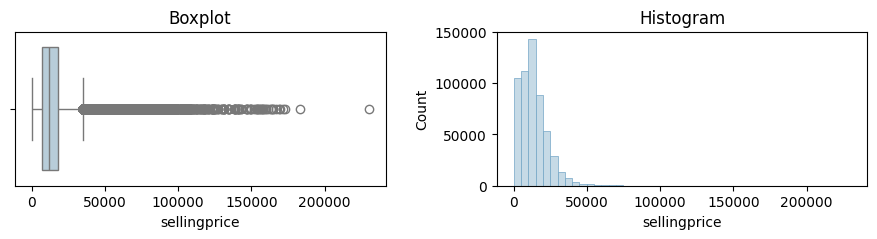

In [57]:
# apply function
bhplt(df_clean,'sellingprice',11,2,0.3,5000)

- selling price plot similar to MMR

### Year (Manufacturing)

Import function to plot histogram and boxplot 

Feature: year
Left Skew: -1.18
Median: 2012.0


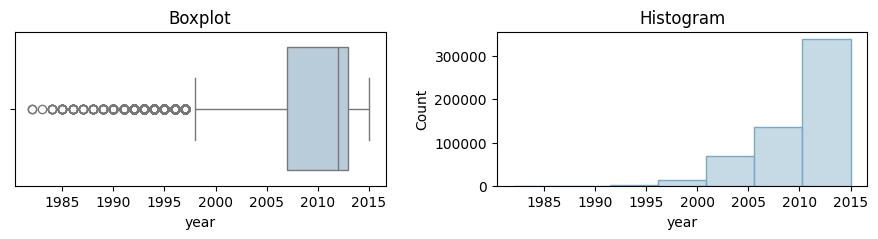

In [123]:
# apply function
bhplt(df_clean,'year',11,2,0.3,5)

- manufacturing year data skewed to the left with most cars manufactured more recently in 2012, followed by 2013, 2014
- 2015: sharp drop in cars manufactured in 2015

Let's check if we have full year of data for 2015

In [124]:
mask_yr = (df_clean['year'] == 2015 ) 
df_clean[mask_yr].head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,sale_weekday,sale_month,sale_day,sale_year
0,2015,kia,Sorento,LX,suv,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue,Dec,16,2014
1,2015,kia,Sorento,LX,suv,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue,Dec,16,2014
3,2015,volvo,S60,T5,sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu,Jan,29,2015
5,2015,nissan,Altima,2.5 S,sedan,automatic,1n4al3ap1fn326013,ca,1.0,5554.0,gray,black,enterprise vehicle exchange / tra / rental / t...,15350.0,10900.0,Tue,Dec,30,2014
11,2015,kia,optima,LX,sedan,automatic,5xxgm4a73fg353538,ca,48.0,2034.0,red,tan,kia motors finance,15150.0,17700.0,Tue,Dec,16,2014


confirmed we have a full year of data for 2015. What could be the reason for sharp drop in manufacuting in 2015?

### Year vs Selling price

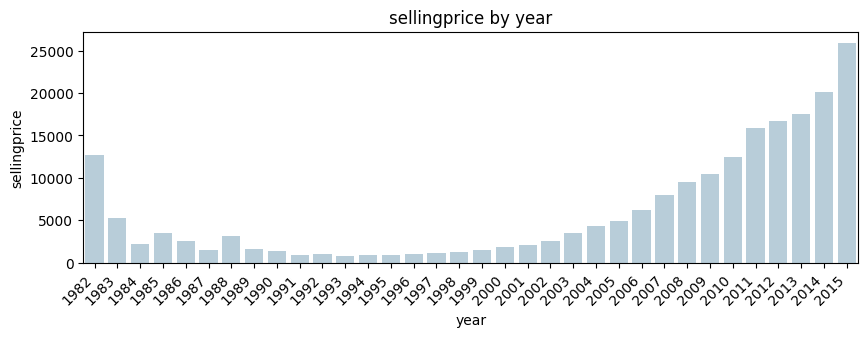

In [125]:
bplts(df_clean,'year','sellingprice',10,3,45,'','')

- cars manufacturing between 2010-2015 have higher selling price while older cars has less value.
- older cars show lower selling price however, `1982` shows decent selling price. is it vintage? 

In [126]:
df_clean.loc[df_clean['year'] == 1982]

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,sale_weekday,sale_month,sale_day,sale_year
207920,1982,NaN,NaN,NaN,NaN,automatic,1g1ay0786c5123682,ca,2.0,85738.0,gold,gray,livermore toyota and livermore scion,6175.0,5000.0,Wed,Jan,28,2015
530893,1982,NaN,NaN,NaN,NaN,automatic,wdbba45a0cb017970,pa,4.0,18404.0,white,gray,adcock brothers inc,3675.0,20500.0,Thu,Jun,11,2015


- data does not show make/model for cars manufactured in `1982`

### Condition

Feature: condition
Left Skew: -0.83
Median: 35.0


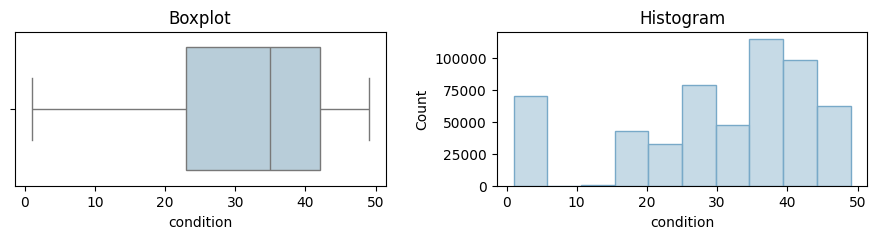

In [127]:
bhplt(df_clean,'condition',11,2,0.3,5)

- conditions range from 1-49, with median at 35.
- most cars were assigned a score of 18.

### Condition vs Selling price

UnboundLocalError: local variable 'orders' referenced before assignment

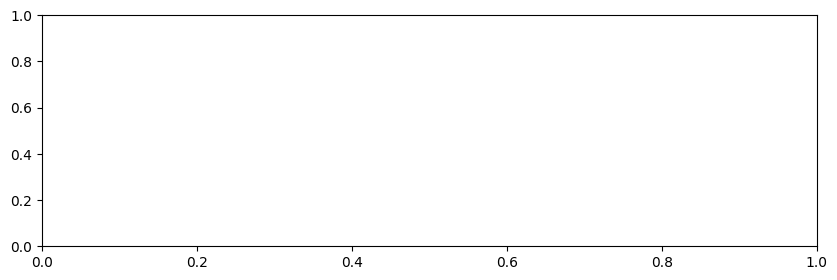

In [61]:
bplts(df_clean,'condition','sellingprice',10,3,45,'desc','')

In [ ]:
df_clean.loc[df_clean['condition'] <6].sort_values(by='sellingprice',ascending=False).head()

- in general, cars with higher condition value have higher selling price

- with some exceptions where conditions are 3,4,5. A quick look into these shows the make for these cars are luxury car makers. Makes sense why the car selling price is high despite low condition value

### mmr

In [ ]:
# apply function
bhplt(df_clean,'mmr',11,2,0.3,5000)

### odometer

In [ ]:
# apply function
bhplt(df_clean,'odometer',11,2,0.3,50000)

### make

In [ ]:
ctplt(df_clean, 'make', 10, 4, 10, 45,'y','%')

### Make vs Selling price

In [ ]:
bplts(df_clean,'make','sellingprice',10,3,45)

> based on average selling price, rolls royce has the highest selling price followed by ferrari and lamborghini

> however, these are luxury makes and not a good representative for comparison across all makes

> should categorize makes by position to get better comparison between similar makes

#### Make Tier

In [ ]:
df6=df5.copy()

In [ ]:
# create a dictionary of replacements
model_positioning = {'kia':'mass market',
                    'bmw':'premium',
                    'volvo':'premium', 
                    'nissan':'mass market', 
                    'chevrolet':'mass market', 
                    'audi':'premium', 
                    'ford':'mass market',
                    'hyundai':'mass market', 
                    'buick':'semi-premium', 
                    'cadillac':'premium', 
                    'acura':'premium', 
                    'lexus':'premium', 
                    'infiniti': 'premium',
                    'jeep': 'semi-premium', 
                    'mercedes': 'premium', 
                    'mitsubishi': 'mass market', 
                    'mazda': 'mass market', 
                    'mini': 'semi-premium', 
                    'land rover': 'premium',
                    'lincoln': 'premium', 
                    'jaguar': 'premium', 
                    'volkswagen': 'semi-premium', 
                    'toyota': 'mass market', 
                    'subaru': 'semi-premium', 
                    'scion': 'mass market',       
                    'porsche': 'luxury',  
                    'dodge': 'mass market', 
                    'fiat': 'mass market', 
                    'chrysler': 'mass market', 
                    'ferrari': 'top of line', 
                    'honda': 'mass market', 
                    'gmc': 'mass market', 
                    'ram': 'mass market', 
                    'smart': 'semi-premium', 
                    'bentley': 'top of line', 
                    'pontiac': 'mass market', 
                    'saturn': 'mass market', 
                    'maserati': 'luxury',
                    'mercury': 'mass market', 
                    'hummer': 'mass market', 
                    'saab': 'other', 
                    'suzuki': 'mass market', 
                    'oldsmobile': 'other', 
                    'isuzu': 'other',              
                    'geo': 'other', 
                    'rolls royce': 'top of line', 
                    'daewoo': 'other', 
                    'plymouth': 'mass market', 
                    'tesla': 'semi-premium', 
                    'airstream': 'mass market',
                    'aston martin': 'top of line', 
                    'fisker': 'other', 
                    'lamborghini': 'top of line', 
                    'lotus':'semi-premium'
                     }

# replace values using the .map() method
df6['make_tier'] = df6['make'].map(model_positioning).fillna(df6['make'])

# print the DataFrame
df6[['make','make_tier']]

In [ ]:
df_ver = 'current: df6 = added make_tier column, df5=convert continuous columns back to float. current: df4a = replace missing values for model. df4 = convert "-" in color and interior to nan. df3 = tranmission rows cleaned and added back to df, df2 =dropped rows where transmission = sedan. df1 = split saledate column, cleaned model names, clean body names'

#### `Make Tier` vs Selling price

In [ ]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(5,3))

# define order the graph but also only showing top 50%
order = df6.groupby(["make_tier"])["sellingprice"].mean().sort_values(ascending=False).index
sns.barplot(df6, x='make_tier', y='sellingprice', ax=ax, errorbar=None, order=order)
plt.title("Selling price by make_tier", fontsize=12)
plt.ylabel("Selling Price")
plt.xlabel("make_tier")
plt.xticks(rotation=45, ha='right')

count = df6['make_tier'].value_counts(ascending=False)
percentage = df6['make_tier'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(count, percentage)]

ax.bar_label(container=ax.containers[0], labels=lbls, fontsize=10, rotation=30,label_type='edge' )

plt.show()

### model

In [ ]:
fig = plt.figure(figsize=(15,4))
ax = sns.countplot(x=df5['model'],
                   order=df5['model'].value_counts(ascending=False).head(40).index)

plt.xticks(
    rotation=45, 
    # horizontalalignment='right',
    # fontweight='light',
    # fontsize=10  
)

count =df5['model'].value_counts(ascending=False)
percentage = df5['model'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(count, percentage)]

# ax.bar_label(container=ax.containers[0], labels=lbls, fontsize=10 )

None

##### Most sold cars by `model` are 

In [ ]:
df5['model'].value_counts(normalize=True).head(5)

##### Least sold cars by `model` are 

In [ ]:
df5['model'].value_counts(normalize=True).tail(5)

#### `trim`

##### Most sold cars by `trim` are 

In [ ]:
fig = plt.figure(figsize=(15,4))
ax = sns.countplot(x=df5['trim'],
                   order=df5['trim'].value_counts(ascending=False).head(40).index)

plt.xticks(
    rotation=45, 
    # horizontalalignment='right',
    # fontweight='light',
    # fontsize=10  
)

count =df5['trim'].value_counts(ascending=False)
percentage = df5['trim'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(count, percentage)]

# ax.bar_label(container=ax.containers[0], labels=lbls, fontsize=10 )

None

In [ ]:
df5['trim'].value_counts(normalize=True).head(5)

##### Least sold cars by `trim` are 

In [ ]:
df5['trim'].value_counts(normalize=True).tail(5)

#### `body`

In [ ]:
fig = plt.figure(figsize=(15,3))
ax = sns.countplot(x=df5['body'],
                   order=df5['body'].value_counts(ascending=False).head(5).index)

plt.xticks(
    rotation=45, 
    # horizontalalignment='right',
    # fontweight='light',
    # fontsize=10  
)

count =df5['body'].value_counts(ascending=False)
percentage = df5['body'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(count, percentage)]

# ax.bar_label(container=ax.containers[0], labels=lbls, fontsize=10 )

None

##### Most sold cars by `body` are 

In [ ]:
df5['body'].value_counts(normalize=True).head(5)

> sedan sales makes up `~44%` of the market 

> suv sales make up `~23%` of the market

##### Least sold cars by `body` are 

In [ ]:
df5['body'].value_counts(normalize=True).tail(5)

#### `transmission`

In [ ]:
fig = plt.figure(figsize=(15,4))
ax = sns.countplot(x=df5['transmission'],
                   order=df5['transmission'].value_counts(ascending=False).index)

plt.xticks(
    rotation=45, 
    # horizontalalignment='right',
    # fontweight='light',
    # fontsize=10  
)

count =df5['transmission'].value_counts(ascending=False)
percentage = df5['transmission'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(count, percentage)]

ax.bar_label(container=ax.containers[0], labels=lbls, fontsize=10 )

None

> 96% of cars sold had auto transmission

#### `state`


In [ ]:
fig = plt.figure(figsize=(15,4))
ax = sns.countplot(x=df5['state'],
                   order=df5['state'].value_counts(ascending=False).index)

plt.xticks(
    rotation=45, 
    # horizontalalignment='right',
    # fontweight='light',
    # fontsize=10  
)

count =df5['state'].value_counts(ascending=False)
percentage = df5['state'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(count, percentage)]

# ax.bar_label(container=ax.containers[0], labels=lbls, fontsize=10 )

None

##### Most sold cars by `state` are 


In [ ]:
df5['state'].value_counts(normalize=True).head(5)

##### Least sold cars by `state` are 

In [ ]:
df5['state'].value_counts(normalize=True).tail(5)

#### `color`


In [ ]:
fig = plt.figure(figsize=(15,4))
ax = sns.countplot(x=df5['color'],
                   order=df5['color'].value_counts(ascending=False).index)

plt.xticks(
    rotation=45, 
    # horizontalalignment='right',
    # fontweight='light',
    # fontsize=10  
)

count =df5['color'].value_counts(ascending=False)
percentage = df5['color'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(count, percentage)]

# ax.bar_label(container=ax.containers[0], labels=lbls, fontsize=10 )

None

##### Most sold cars by `color` are 


In [ ]:
df5['color'].value_counts(normalize=True).head(5)

> muted colors are more popular in the market with black and white leading at ~`20%`

##### Least sold cars by `color` are 

In [ ]:
df5['color'].value_counts(normalize=True).tail(5)

#### `interior`


In [ ]:
fig = plt.figure(figsize=(15,4))
ax = sns.countplot(x=df5['interior'],
                   order=df5['interior'].value_counts(ascending=False).index)

plt.xticks(
    rotation=45, 
    # horizontalalignment='right',
    # fontweight='light',
    # fontsize=10  
)

# count =df5['interior'].value_counts(ascending=False)
# percentage = df5['interior'].value_counts(ascending=False, normalize=True).values * 100
# lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(count, percentage)]

# ax.bar_label(container=ax.containers[0], labels=lbls, fontsize=10 )

None

> black and gray are most popular colors for interiors

#### `seller`


##### Most sold cars by `seller` are 


In [ ]:
df5['seller'].value_counts(normalize=True).head(5)

##### Least sold cars by `seller` are 

In [ ]:
df5['seller'].value_counts(normalize=True).tail(5)

#### `sale_weekday`


In [ ]:
fig = plt.figure(figsize=(15,4))
ax = sns.countplot(x=df5['sale_weekday'],
                   order=df5['sale_weekday'].value_counts(ascending=False).index)

plt.xticks(
    rotation=45, 
    # horizontalalignment='right',
    # fontweight='light',
    # fontsize=10  
)

count =df5['sale_weekday'].value_counts(ascending=False)
percentage = df5['sale_weekday'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(count, percentage)]

ax.bar_label(container=ax.containers[0], labels=lbls, fontsize=10 )

None

> most care sales occured on `Wed` > `Tues` > `Thurs`

> Least amount of cars were sold on the weekends.

#### `sale_month`


In [ ]:
fig = plt.figure(figsize=(15,4))
ax = sns.countplot(x=df5['sale_month'],
                   order=df5['sale_month'].value_counts(ascending=False).index)

plt.xticks(
    rotation=45, 
    # horizontalalignment='right',
    # fontweight='light',
    # fontsize=10  
)

count =df5['sale_month'].value_counts(ascending=False)
percentage = df5['sale_month'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(count, percentage)]

ax.bar_label(container=ax.containers[0], labels=lbls, fontsize=10 )

None

> most car sales in `Feb` and least in `Jul`

#### `sale_day`


In [ ]:
fig = plt.figure(figsize=(15,4))
ax = sns.countplot(x=df5['sale_day'],
                   order=df5['sale_day'].value_counts(ascending=False).index)

plt.xticks(
    rotation=45, 
    # horizontalalignment='right',
    # fontweight='light',
    # fontsize=10  
)

count =df5['sale_day'].value_counts(ascending=False)
percentage = df5['sale_day'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(count, percentage)]

# ax.bar_label(container=ax.containers[0], labels=lbls, fontsize=10 )

None

#### `sale_year`


In [ ]:
fig = plt.figure(figsize=(4,4))
ax = sns.countplot(x=df5['sale_year'],
                   order=df5['sale_year'].value_counts(ascending=False).index)

plt.xticks(
    rotation=45, 
    # horizontalalignment='right',
    # fontweight='light',
    # fontsize=10  
)

count =df5['sale_year'].value_counts(ascending=False)
percentage = df5['sale_year'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(count, percentage)]

ax.bar_label(container=ax.containers[0], labels=lbls, fontsize=10 )

None

#### `Model` vs Selling price

In [ ]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(10,3))

# define order the graph but also only showing top 25 rows
order = df6.groupby(['model'])["sellingprice"].mean().sort_values(ascending=False).head(25).index
sns.barplot(df6, x='model', y='sellingprice', ax=ax, errorbar=None, order=order)
plt.title("Selling price by model", fontsize=12)
plt.ylabel("Selling Price")
plt.xlabel("model")
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
df6.groupby('model')["sellingprice"].mean().sort_values(ascending=False)


> based on average selling price, 458 Italia model has the highest selling price followed by 360 and 6 series gran coupe.

> however, these are higher tier car models and not a good representative for comparison across all models.

> should categorize models by make_tier to get better comparison between similar models.

#### `Model`/`Make_Tier` vs Selling price

Steps

1. Create a filterd df for each make tier
2. then graph

##### Top of Line 

In [ ]:
df_top = df6.loc[df6['make_tier'] == 'top of line']
df_top.head(2)


In [ ]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(10,3))

# define order the graph but also only showing top 50%
order = df_top.groupby(['model'])["sellingprice"].mean().sort_values(ascending=False).index
sns.barplot(df_top, x='model', y='sellingprice', ax=ax, errorbar=None, order=order)
ax.bar_label(container=ax.containers[0], fontsize=10, rotation=90, label_type='center' )
plt.title("Selling price by model for top of line car makers", fontsize=12)
plt.ylabel("Selling Price")
plt.xlabel("model")
plt.xticks(rotation=45, ha='right')
plt.show()

> Top selling models for the top of the line car makers are 
1. 458 Italia - averages 183K
2. Flying Spur
3. Ghost

##### Luxury

In [ ]:
df_lux = df6.loc[df6['make_tier'] == 'luxury']
df_lux.head(2)


In [ ]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(10,3))

# define order the graph but also only showing top 50%
order = df_lux.groupby(['model'])["sellingprice"].mean().sort_values(ascending=False).index
sns.barplot(df_lux, x='model', y='sellingprice', ax=ax, errorbar=None, order=order)
ax.bar_label(container=ax.containers[0], fontsize=10, rotation=90, label_type='center' )
plt.title("Selling price by model for luxury car makers", fontsize=12)
plt.ylabel("Selling Price")
plt.xlabel("model")
plt.xticks(rotation=45, ha='right')
plt.show()

> For luxury car makers, top selling models are
1. GranTurismo convertible
2. 911
3. Macan

##### Premium

In [ ]:
df_prem = df6.loc[df6['make_tier'] == 'premium']
df_prem.head(2)


In [ ]:
df_prem.describe()

In [ ]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(15,3))

# define order the graph but also only showing top 50%
order = df_prem.groupby(['model'])["sellingprice"].mean().sort_values(ascending=False).head(50).index
sns.barplot(df_prem, x='model', y='sellingprice', ax=ax, errorbar=None, order=order)
# ax.bar_label(container=ax.containers[0], fontsize=10, rotation=90, label_type='center' )
plt.title("Selling price by model for premium car makers", fontsize=12)
plt.ylabel("Selling Price")
plt.xlabel("model")
plt.xticks(rotation=45, ha='right')
plt.show()

##### Semi-Premium

In [ ]:
df_semi = df6.loc[df6['make_tier'] == 'semi-premium']
df_semi.head(2)


In [ ]:
df_semi.describe()

In [ ]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(15,3))

# define order the graph but also only showing top 50%
order = df_semi.groupby(['model'])["sellingprice"].mean().sort_values(ascending=False).head(20).index
sns.barplot(df_semi, x='model', y='sellingprice', ax=ax, errorbar=None, order=order)
# ax.bar_label(container=ax.containers[0], fontsize=10, rotation=90, label_type='center' )
plt.title("Selling price by model for premium car makers", fontsize=12)
plt.ylabel("Selling Price")
plt.xlabel("model")
plt.xticks(rotation=45, ha='right')
plt.show()

##### Mass market

In [ ]:
df_mass = df6.loc[df6['make_tier'] == 'mass market']
df_mass.head(2)


In [ ]:
df_mass.describe()

In [ ]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(15,3))

# define order the graph but also only showing top 50%
order = df_mass.groupby(['model'])["sellingprice"].mean().sort_values(ascending=False).head(20).index
sns.barplot(df_mass, x='model', y='sellingprice', ax=ax, errorbar=None, order=order)
# ax.bar_label(container=ax.containers[0], fontsize=10, rotation=90, label_type='center' )
plt.title("Selling price by model for MASS MARKET car makers", fontsize=12)
plt.ylabel("Selling Price")
plt.xlabel("model")
plt.xticks(rotation=45, ha='right')
plt.show()

#### Make Tier Statistics

In [ ]:
#calculate the mean selling price by car maker tier
top_mean = round(df_top['sellingprice'].mean(),0)
lux_mean = round(df_lux['sellingprice'].mean(),0)
pre_mean = round(df_prem['sellingprice'].mean(),0)
semi_mean = round(df_semi['sellingprice'].mean(),0)
mass_mean = round(df_mass['sellingprice'].mean(),0)


print('Mean selling price by car maker tier')
print('Top of Line: ', top_mean)
print('Luxury: ', lux_mean)
print('Premium: ', pre_mean)
print('Semi-premium: ', semi_mean)
print('Mass market: ', mass_mean)

print('')

top_count =df_top.shape[0]
lux_count =df_lux.shape[0]
pre_count =df_prem.shape[0]
semi_count =df_semi.shape[0]
mass_count =df_mass.shape[0]

print('Count of cars by car maker tier')
print('Top of Line: ', top_count)
print('Luxury: ', lux_count)
print('Premium: ', pre_count)
print('Semi-premium: ', semi_count)
print('Mass market: ', mass_count)
print('')

top_sum = round(df_top['sellingprice'].sum(),0)
lux_sum =  round(df_lux['sellingprice'].sum(),0)
pre_sum = round(df_prem['sellingprice'].sum(),0)
semi_sum = round(df_semi['sellingprice'].sum(),0)
mass_sum =  round(df_mass['sellingprice'].sum(),0)

print('Sum selling price by car maker tier')
print('Top of Line: ', top_sum)
print('Luxury: ', lux_sum)
print('Premium: ', pre_sum)
print('Semi-premium: ', semi_sum)
print('Mass market: ',mass_sum)



In [ ]:
top_mean/mass_mean

In [ ]:
mass_sum/top_sum

In [ ]:
mass_sum/(top_sum+lux_sum+pre_sum+semi_sum)

> On average, top of the line cars sells 6x more than mass market cars

> however, there are more mass market cars than top of the line cars; therfore the overall sales genrated from mass market cars is more than 300x that of top of the line cars

> sales of mass market cars are still 2x more than all other tiers combined


#### `Odometer` vs Selling price

##### Group odometer into bins

In [ ]:
interval_range = pd.interval_range(start=0, freq=10000, end=200000)
df6['odometer_bins'] = pd.cut(df6['odometer'], bins=interval_range, labels=[1,2,3])
df6[['odometer','odometer_bins']]

In [ ]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(15, 5))

ax = sns.barplot(df6, x="odometer_bins", y='sellingprice', ax=ax, errorbar=None)
ax.bar_label(container=ax.containers[0], fontsize=10, rotation=90, label_type='center' )
plt.title("Selling price by odometer", fontsize=12);
plt.ylabel("Selling Price")
plt.xlabel("odometer")
plt.xticks(rotation=45, ha='right')
plt.show()



> average selling price is highest when vehicle's odometer is less than 10000

#### Day vs selling price

In [ ]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(15, 5))
order = df6.groupby(['sale_day'])["sellingprice"].mean().sort_values(ascending=False).index
ax = sns.barplot(df6, x="sale_day", y='sellingprice', ax=ax, errorbar=None)
ax.bar_label(container=ax.containers[0], fontsize=10, rotation=90, label_type='center' )
plt.title("Selling price by day of the month", fontsize=12);
plt.ylabel("Selling Price")
plt.xlabel("day of the month")
plt.xticks(rotation=45, ha='right')
plt.show()



> no major standout when filtering average selling price by day of the month

#### Month vs selling price

In [ ]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(15, 5))
order = df6.groupby(['sale_month'])["sellingprice"].mean().sort_values(ascending=False).index
ax = sns.barplot(df6, x="sale_month", y='sellingprice', ax=ax, errorbar=None, order=order)
ax.bar_label(container=ax.containers[0], fontsize=10, rotation=90, label_type='center' )
plt.title("Selling price by  month", fontsize=12);
plt.ylabel("Selling Price")
plt.xlabel("day of the month")
plt.xticks(rotation=45, ha='right')
plt.show()



> Jul is the month with highest average selling price yet it was the month with least number of sales

#### State vs selling price

In [ ]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(15, 5))
order = df6.groupby(['state'])["sellingprice"].mean().sort_values(ascending=False).index
ax = sns.barplot(df6, x="state", y='sellingprice', ax=ax, errorbar=None, order =order)
ax.bar_label(container=ax.containers[0], fontsize=10, rotation=90, label_type='center' )
plt.title("Selling price by state", fontsize=12);
plt.ylabel("Selling Price")
plt.xlabel("state")
plt.xticks(rotation=45, ha='right')
plt.show()



> Ontario has the highest average selling price followed by tennesee and pennsylvania